In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import dynadojo as dd
import numpy as np

2023-08-10 12:28:29.463786: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<Figure size 640x480 with 1 Axes>, <Axes: >)

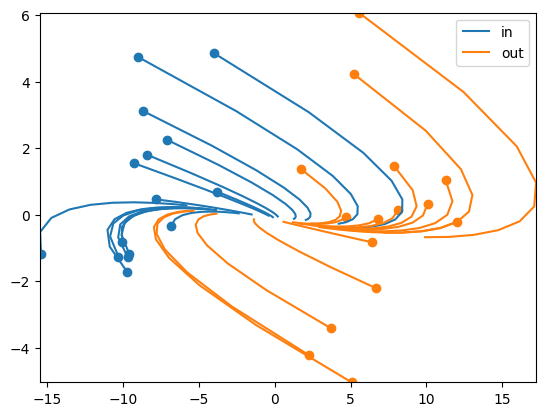

In [2]:
latent_dim = 2
embed_dim = 3
n = 15
timesteps = 10
system = dd.systems.LDSSystem(latent_dim, embed_dim, noise_scale=0)
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = system.make_data(y0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps, noisy=True)
dd.utils.lds.plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)

In [13]:
linear_model = dd.baselines.DNN(embed_dim, timesteps, activation=None, max_control_cost=0)
linear_model.fit(x, epochs=10, verbose='auto')
x_pred = linear_model.predict(x[:, 0], 50)
y_pred = linear_model.predict(y[:, 0], 50)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")

Epoch 1/10
2/2 [==============================] - 2s 9ms/step - loss: 32.9496
Epoch 2/10
2/2 [==============================] - 0s 9ms/step - loss: 24.3917
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 18.9551
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 12.9464
Epoch 5/10
2/2 [==============================] - 0s 9ms/step - loss: 7.8027
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 4.0240
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 3.3035
Epoch 8/10
2/2 [==============================] - 0s 9ms/step - loss: 4.7423
Epoch 9/10
2/2 [==============================] - 0s 9ms/step - loss: 4.8921
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 3.6326



KeyboardInterrupt



In [ ]:
nonlinear_model = dd.baselines.DNN(embed_dim, timesteps, activation="tanh", max_control_cost=0)
nonlinear_model.fit(x, epochs=10, verbose='auto')
x_pred = nonlinear_model.predict(x[:, 0], 50)
y_pred = nonlinear_model.predict(y[:, 0], 50)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")